In [1]:
#importing the labs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df = pd.read_csv("D:/ashrikha/OneDrive - George Mason University - O365 Production/Desktop/Portfolio/Hypothesis Testing Project/yellow_tripdata_2020-01.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes #checking the datatypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
#changing the data types

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [7]:
df.dtypes #checking the datatypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df["Duration"]= df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
#here we are making a new column to get the duration in mins which will useful for further analysis
#this step is called feature_extraction.

In [9]:
df.head()
#here we can see that the new column is now added but still we need to convert it into mins.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [10]:
#lets convert it into mins 
df["Duration"] = df["Duration"].dt.total_seconds()/60
#this total_seconds function will convert it into secs and dividing by 60 will give us the time in mins and will store it in
#the same column duration.

In [11]:
df.head()
#now it is changed

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [12]:
#now lets filter the dataset 
df = df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [13]:
#checking missing values 
df.isnull()

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6405003,True,True,False,False,False
6405004,True,True,False,False,False
6405005,True,True,False,False,False
6405006,True,True,False,False,False


In [14]:
#now to get the count of missing values 
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
Duration               0
dtype: int64

In [15]:
#now lets check how much these null values actually contribute to the overall data and then we can see if we should 
#get rid of these or we need to fill these
(65441/len(df))*100
#here we are using this method = count of missing vales/lenth of the actual data * 100(for the percentage value)

1.021716132126611

In [16]:
#the value is (1.021716132126611) which is very less and hence we can get rid of the missing values.
df.dropna(inplace = True)
#and lets check the data once again
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [17]:
#now lets do the conversion of float values to integers as the passenger count cannot be 1.5 same for payment
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
#and lets check 
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [18]:
#now get rid of the duplicates after seeing the count
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [19]:
#droping the duplicate value 
df.drop_duplicates(inplace= True)
#checking once again 
df.shape

(3007861, 5)

In [20]:
#now lets check the contribution of the columns
df['passenger_count']. value_counts(normalize= True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [21]:
#same for payment_type 
df['payment_type'].value_counts(normalize= True)

1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In [22]:
#now choosing the required data
df =df[df['payment_type']<3]
df =df[(df['passenger_count']>0) & (df['passenger_count']<6)]
#and now checking again
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [23]:
# changing the payment type to card and cash
df['payment_type'].replace([1,2],['Card','Cash'], inplace = True)
#checking it once again
df
#we have filtered out the categorical data

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [24]:
df.describe()
#getting an overview to check the negative values and getting rid of it
#and if we check the 75% and max there are a lot of outliers present

,passenger_count,fare_amount,trip_distance,Duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [25]:
#filtering again and taking the positive values only 
df= df[df['fare_amount']>0]
df= df[df['trip_distance']>0]
df= df[df['fare_amount']>0]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


(array([2.749067e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

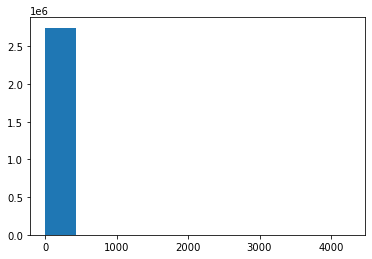

In [26]:
#lets check the outliers
plt.hist(df['fare_amount'])
#see the values have reached til 4000 but are not visible and hence it can be predicted as an outlier.

{'whiskers': [<matplotlib.lines.Line2D at 0x19632bd6b50>,
 'caps': [<matplotlib.lines.Line2D at 0x19632be91f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19632bd6700>],
 'medians': [<matplotlib.lines.Line2D at 0x19632be9910>],
 'fliers': [<matplotlib.lines.Line2D at 0x19632be9ca0>],
 'means': []}

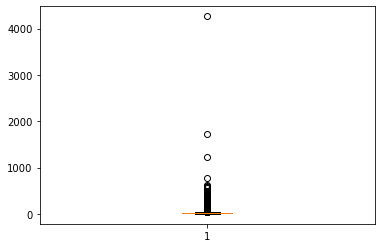

In [27]:
#for better understanding we can check it with boxplot as well.
plt.boxplot(df['fare_amount'])

In [28]:
#now filtering again 

for col in ['fare_amount', 'trip_distance', 'Duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    
    df = df[(df[col]>= lower_bound)& (df[col]<= upper_bound)]
    
#and checking it once again 
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


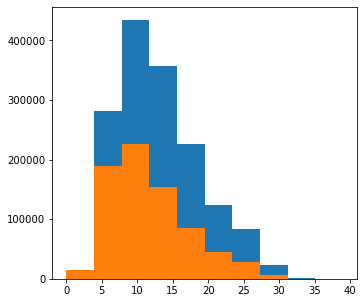

In [29]:
#now lets see if the customers prefer cash or card o
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df[df['payment_type']=='Card'] ['fare_amount'], histtype='barstacked')
plt.hist(df[df['payment_type']=='Cash'] ['fare_amount'], histtype='barstacked')
plt.show()
#on the basis of fare_amount

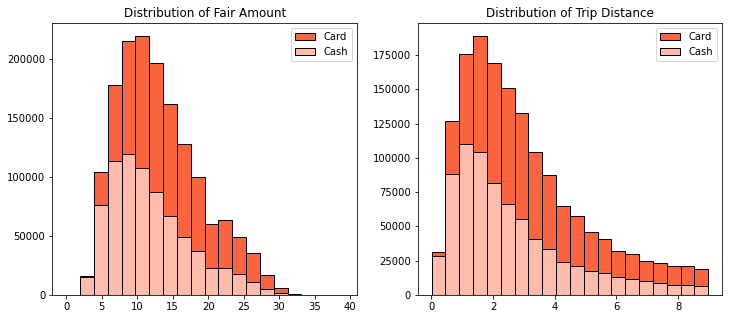

In [30]:
#lets modify this graph
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fair Amount')
plt.hist(df[df['payment_type']=='Card'] ['fare_amount'], histtype='barstacked', bins =20, edgecolor ='k', color ='#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Cash'] ['fare_amount'], histtype='barstacked', bins =20, edgecolor ='k', color ='#FFBCAB',label='Cash')
plt.legend()



plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type']=='Card'] ['trip_distance'], histtype='barstacked', bins =20, edgecolor ='k', color ='#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Cash'] ['trip_distance'], histtype='barstacked', bins =20, edgecolor ='k', color ='#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [31]:
#checking the stats
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.112407  5.849334      2.992213  1.992747
Cash           11.757844  5.613079      2.602164  1.913734

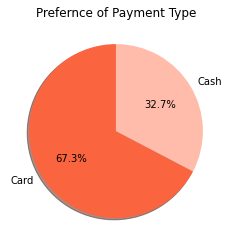

In [32]:
plt.title('Prefernce of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize= True), labels=df['payment_type'].value_counts().index,
        startangle=90, shadow='True', autopct='%1.1f%%', colors= ['#FA643F','#FFBCAB'])
plt.show()

In [33]:
#let's to passenger count analysis
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         909296
             2                         327664
             3                         122415
             4                          63677
             5                         124045
Cash         1                         460585
             2                         155480
             3                          54508
             4                          32716
             5                          47626

In [34]:
#now lets get it into percentage
passenger_count = df.groupby(['payment_type', 'passenger_count'])['passenger_count'].count()
passenger_count = passenger_count.reset_index(name='count')
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100
passenger_count


,payment_type,passenger_count,count,perc
0,Card,1,909296,39.568810
1,Card,2,327664,14.258585
2,Card,3,122415,5.326996
3,Card,4,63677,2.770960
4,Card,5,124045,5.397927
5,Cash,1,460585,20.042759
6,Cash,2,155480,6.765848
7,Cash,3,54508,2.371963
8,Cash,4,32716,1.423665
9,Cash,5,47626,2.072487


In [37]:
df3 = pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df3['payment_type'] = ['Card', 'Cash']
df3.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df3.iloc[1,1:] = passenger_count.iloc[5:,-1]
df


,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


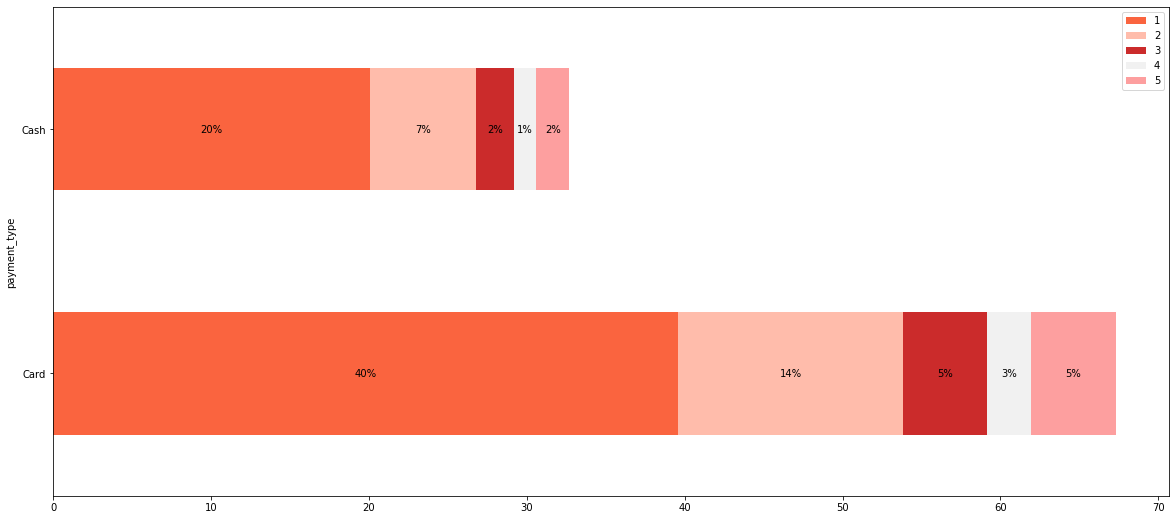

In [38]:
ax =df3.plot(x='payment_type', kind='barh', stacked=True, figsize=(20, 9), color=['#FA643F', '#FFBCAB', '#CB2B2B', '#F1F1F1', '#FD9F9F'])

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')



# # Null hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash.

Alternative hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash.


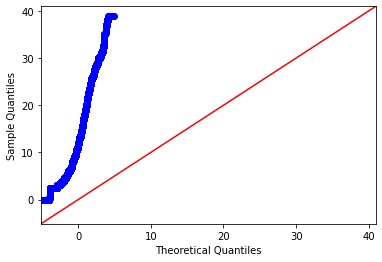

In [39]:
sm.qqplot(df['fare_amount'],line = '45')
plt.show()

In [40]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

t_stats, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T statistic', t_stats, 'p-value', p_value)


T statistic 169.22369987123486 p-value 0.0


In [ ]:
#The conclusion of the t-test, based on the provided output, is that there is a statistically significant difference in 
#the average fare amount between customers who use credit cards and those who use cash. Given that the p-value is reported
#as 0.0 (or very close to 0), we can reject the null hypothesis, which stated there is no difference in average fare between 
#the two payment methods.

#This means that, according to the t-test results, the alternative hypothesis is supported, suggesting that the type of payment 
#method used (credit card versus cash) is associated with a difference in the fare amount customers pay.